# Extracting Tesla and GameStop Stock Data
## Content Description
About this project:
The tesla company and the GameStop company will be taken as examples
1. Two different balance data extraction techniques will be used:
    1. The first extraction of financial statement data will be based on the use of the yfinance library
    2. The second method of extracting balance sheet data will be based on the webscaping technique, i.e. web pages with the interested data will be scanned and they will be processed
2. In the final part of the project, the data from both balance will be processed to project a graph based on two axes, one will be the balance in millions, the other axis will correspond to the trend over the years of the balance
## Summerie
1. Use yfinance to Extract Stock Data about Tesla
2. Use Webscraping to Extract Tesla Revenue Data
3. Use yfinance to Extract Stock Data about GameStop
4. Use Webscraping to Extract GameStop Revenue Data
5. Plot Tesla Stock Graph
6. Plot GameStop Stock Graph
## Lenguages and libraries
In this project I will use Python and Markdown, in addiction the following libraries :
- yfinance : for have the balance of different company
- requests : for the webscariping process 
- BeautifulSoup : for the webscariping process 
- plotly : for draw graphs
- matplotlib : for easy math and draw graphs

In [1]:
%pip install yfinance
%pip install requests
%pip install bs4
%pip install plotly
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Use yfinance to Extract Stock Data about Tesla

In [2]:
import yfinance as yf
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
tesla=yf.Ticker('TSLA')

In [4]:
tesla_data=tesla.history(period="ytd")

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,0.0,0.0
1,2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,0.0,0.0
2,2024-01-04 00:00:00-05:00,239.250000,242.699997,237.729996,237.929993,102629300,0.0,0.0
3,2024-01-05 00:00:00-05:00,236.860001,240.119995,234.899994,237.490005,92379400,0.0,0.0
4,2024-01-08 00:00:00-05:00,236.139999,241.250000,235.300003,240.449997,85166600,0.0,0.0


# Use Webscraping to Extract Tesla Revenue Data

In [6]:
url="https://stockanalysis.com/stocks/tsla/revenue/"
html_data=requests.get(url).text

In [7]:
beautiful_soup=BeautifulSoup(html_data,"html5lib")

In [8]:
tables=beautiful_soup.find_all("table")

table_index=0

lst_d_tsla = []
lst_b_tsla = []

for index,table in enumerate(tables):
    if("Revenue History" in str(table)):
        table_index=index

txt_table=tables[table_index].text
split_table_tesla=txt_table.split("Dec 31")

split_table_tesla.remove(split_table_tesla[0])
for id in range(len(split_table_tesla)):
    data_time = "Dec 31"+split_table_tesla[id][0:6]
    lst_d_tsla.append(int(split_table_tesla[id][1:6]))
    Bid = split_table_tesla[id].find("B") 
    Mid = split_table_tesla[id].find("M") 
    Kid = split_table_tesla[id].find("K") 
    BMKid = max(max(Bid, Mid), Kid)
    if BMKid > 14 :
        BMKid = min(Bid, Mid)
    value_balance=split_table_tesla[id][6:(BMKid+1)]
    lst_b_tsla.append(value_balance)
    #print(data_time, value_balance)

df_tesla=pd.DataFrame({'Years':lst_d_tsla, 'Revenue': lst_b_tsla})
df_tesla.tail()


,Years,Revenue
12,2011,204.24M
13,2010,116.74M
14,2009,111.94M
15,2008,14.74M
16,2007,73.00K


# Use yfinance to Extract Stock Data about GameStop

In [9]:
gmestop=yf.Ticker("GME")

In [10]:
gme_data=gmestop.history(period="max")

In [11]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Use Webscraping to Extract GME Revenue Data

In [12]:
import pandas as pd

In [13]:
url="https://stockanalysis.com/stocks/gme/revenue/"
html_data=requests.get(url).text

In [14]:
beautiful_soup=BeautifulSoup(html_data,"html5lib")

In [15]:
tables=beautiful_soup.find_all("table")

txt_table=tables[0].text

split_table_game=txt_table.split("%")

list_date_game=[]
list_balance_game=[]

for id in range(len(split_table_game)):
    #time
    id_coma = split_table_game[id].find(",")
    id_balance_b = split_table_game[id].find("B")
    id_balance_m = split_table_game[id].find("M")
    id_min = min(id_balance_b, id_balance_m)
    if id_min < 6 :
        id_min = max(id_balance_b, id_balance_m)
    list_balance_game.append(split_table_game[id][(id_coma+6):(id_min+1)])
    if(id == 0) :
        id_first_str = split_table_game[id].find("Feb 3")
        list_date_game.append(split_table_game[id][id_first_str:(id_coma+6)])
    else:
        list_date_game.append(split_table_game[id][0:(id_coma+6)])

#for id in range(len(list_date_game)):
    # print(id, list_date_game[id], list_balance_game[id])

df_game=pd.DataFrame({'Years':list_date_game, 'Revenue': list_balance_game})
df_game.tail()

,Years,Revenue
20,"Jan 31, 2004",1.58B
21,"Feb 1, 2003",1.35B
22,"Feb 2, 2002",1.12B
23,"Feb 3, 2001",756.70M
24,"Jan 30, 1999",465.17M


# Plot Tesla Stock Graph

In [16]:
import matplotlib.pyplot as plt

In [17]:
def make_graph(list_x, list_y, title):
    plt.plot(list_x, list_y)
    plt.xlabel('Years')
    plt.ylabel('Millions')
    plt.title(title)
    plt.show()

In [18]:
list_date_tesla=[]
list_balance_tesla=[]

for id in range(len(split_table_tesla)):
    start_list=split_table_tesla[id].find(",")
    start_list_end=len(split_table_tesla[id])
    split_table_tesla[id]=split_table_tesla[id][start_list:start_list_end]

for id in range(len(split_table_tesla)):
    list_date_tesla.append(int(split_table_tesla[id][1:6]))
    Bid = split_table_tesla[id].find("B") 
    Mid = split_table_tesla[id].find("M") 
    Kid = split_table_tesla[id].find("K") 
    BMKid = max(max(Bid, Mid), Kid)
    k_value = 1.0
    if BMKid > 14 :
        BMKid = min(Bid, Mid)
    if split_table_tesla[id][BMKid] == "B":
        k_value = 1000.0
    elif split_table_tesla[id][BMKid] == "K":
        k_value = 0.001
    list_balance_tesla.append((float(split_table_tesla[id][6:(BMKid)]))*k_value)

for id in range(len(list_date_tesla)):
    print(id, list_date_tesla[id], list_balance_tesla[id])

0 2023 96770.0
1 2022 81460.0
2 2021 53820.0
3 2020 31540.0
4 2019 24580.0
5 2018 21460.0
6 2017 11760.0
7 2016 7000.0
8 2015 4050.0
9 2014 3200.0
10 2013 2009.9999999999998
11 2012 413.26
12 2011 204.24
13 2010 116.74
14 2009 111.94
15 2008 14.74
16 2007 0.073


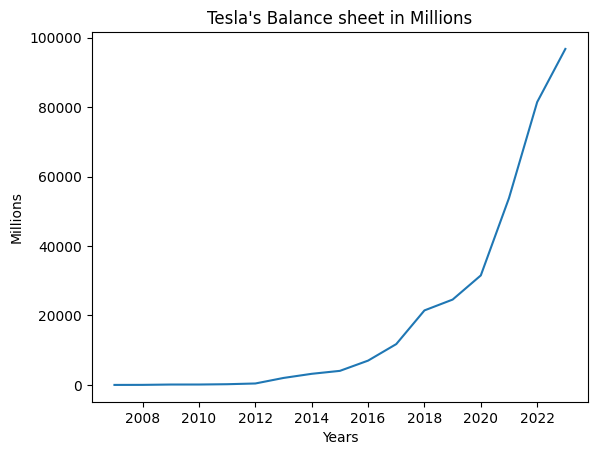

In [19]:
make_graph(list_date_tesla, list_balance_tesla,"Tesla's Balance sheet in Millions")

## Plot GameStop

In [20]:
import matplotlib.pyplot as plt

In [21]:
plot_date=[]
plot_balance=[]


for id in range(len(list_date_game)):
    id_coma = list_date_game[id].find(",")
    #print(int(list_date[id][(id_coma+1):(id_coma+6)]))
    plot_date.append(int(list_date_game[id][(id_coma+1):(id_coma+6)]))
    len_num_M = list_balance_game[id].find("M")
    len_num_B = list_balance_game[id].find("B")
    if len_num_M > len_num_B :
        number = float(list_balance_game[id][0:len_num_M])
        number = number
    else :
        number = float(list_balance_game[id][0:len_num_B])
        number = number * 1000
    plot_balance.append(number)
for id in range(len(list_date_game)):
    print(id, plot_date[id], plot_balance[id])

0 2024 5270.0
1 2023 5930.0
2 2022 6010.0
3 2021 5090.0
4 2020 6470.0
5 2019 8290.0
6 2018 8550.0
7 2017 7970.0
8 2016 9360.0
9 2015 9300.0
10 2014 9040.0
11 2013 8890.0
12 2012 9550.0
13 2011 9470.0
14 2010 9080.0
15 2009 8810.0
16 2008 7090.0
17 2007 5320.0
18 2006 3090.0
19 2005 1840.0
20 2004 1580.0
21 2003 1350.0
22 2002 1120.0
23 2001 756.7
24 1999 465.17


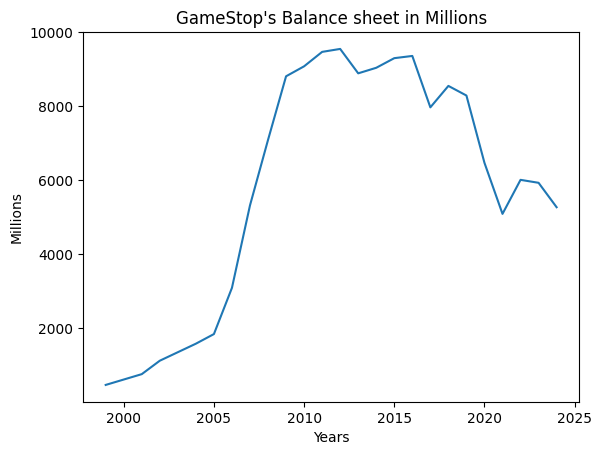

In [22]:

make_graph(plot_date, plot_balance,"GameStop's Balance sheet in Millions")

### Objectives:
- Introductions
- Extract stock of Tesla by yfinance
- Extract stock of Tesla by webscraping
- Extract stock of GameStop by yfinance
- Extract stock of GameStop by webscraping
- Use the webscraping data of Tesla balance for draw a plot
- Use the webscraping data of GameStop balance for draw a plot

## Author : Enrico Baldasso
### Notebook based on course IBM Data Science